Subject: Data Feature Engineering & Machine Learning Code Submission.

Date: January 8, 2025.

Dear Professor Ilia Tetin,

I am writing on behalf of our presentation team, which includes two members:

*   LE TRAN NHA TRAN - JASMINE (Student ID: 11285100M);
*   DINH VAN LONG - BRAD (Student ID: 11285109M).



Below is the machine learning code we implemented, based on the following approach:

- Start with Ridge Regression to achieve a better balance between interpretability and performance. This serves as the baseline model.
- Experiment with k-Nearest Neighbors (kNN) to explore the impact of local patterns in the data.
- Incorporate Random Forest in the pipeline to capture non-linear interactions among features.
- Finally, use SHAP (SHapley Additive exPlanations) to report feature importance and enhance interpretability of the tree-based model.

In [ ]:
%%capture
!git clone https://github.com/Brad-1999/Used-phone-group-project
%cd Used-phone-group-project

In [ ]:
%%capture
!pip install -r requirements.txt

To keep the main notebook organized and free of large chunks of code, we moved those sections into a shared repository hosted at https://github.com/Brad-1999/Used-phone-group-project.

1. Data Crawling

In [ ]:
# !scrapy crawl chotot

2. Modeling

In [ ]:
import sys
sys.path.append(".")

# Import the SHAP library for explainability
import shap
# Import custom functions from the `src.trainer` module
from src.trainer import (
    calculate_shap_values,       # Function to calculate SHAP values for model explainability
    create_train_test_splits,    # Function to split data into training and testing sets
    evaluate_model,              # Function to evaluate a trained model on test data
    load_and_preprocess_data,    # Function to load and preprocess the dataset
    report_performance,          # Function to print or summarize model performance metrics
    train_model,                 # Function to train a specified model with given parameters
)

In [ ]:
# Load and preprocess the dataset
X, y = load_and_preprocess_data("data/cleaned_info.csv")

In [ ]:
# Split the dataset into training and testing sets
# X: Feature dataset
# y: Target variable dataset
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=42: Ensures reproducibility of the train-test split by fixing the random seed
X_train, X_test, y_train, y_test = create_train_test_splits(X, y, test_size=0.2, random_state=42)

In [ ]:
# Parameters for Ridge Regression
ridge_params = {
    "alpha": 1.0,  # Regularization strength; default is 1.0
    "param_grid": {  # Grid of hyperparameters for tuning
        "alpha": [0.1, 1.0, 10.0]  # Test different regularization strengths
    },
}

# Parameters for K-Nearest Neighbors (KNN)
knn_params = {
    "n_neighbors": 5,  # Number of neighbors for the default model; default is 5
    "param_grid": {  # Grid of hyperparameters for tuning
        "n_neighbors": [3, 5, 7],  # Test different numbers of neighbors
        "weights": ["uniform", "distance"],  # Test uniform vs. distance-based weighting
    },
}

# Parameters for Random Forest
rf_params = {
    "n_estimators": 50,  # Default number of trees; default is 50
    "param_grid": {  # Grid of hyperparameters for tuning
        "n_estimators": [25, 50, 100],  # Test different numbers of trees
        "max_depth": [None, 5, 10],  # Test different maximum tree depths
        "min_samples_split": [2, 5],  # Test minimum samples required to split a node
    },
}

In [ ]:
# Train Ridge Regression model
ridge_model = train_model(X_train, y_train, "ridge", ridge_params)
# Train K-Nearest Neighbors (KNN) model
knn_model = train_model(X_train, y_train, "knn", knn_params)
# Train Random Forest model
rf_model = train_model(X_train, y_train, "random_forest", rf_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.79132e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# Evaluate Ridge Regression model
# ridge_model: Trained Ridge Regression model
# X_test: Test dataset (features) used for evaluation
# y_test: Test dataset (target variable) used for evaluation
# evaluate_model: Function that computes performance metrics (e.g., MAE, RMSE, R2, etc.)
ridge_metrics = evaluate_model(ridge_model, X_test, y_test)

# Evaluate K-Nearest Neighbors (KNN) model
# knn_model: Trained KNN model
# X_test: Test dataset (features)
# y_test: Test dataset (target variable)
knn_metrics = evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
# rf_model: Trained Random Forest model
# X_test: Test dataset (features)
# y_test: Test dataset (target variable)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

In [ ]:
print("Ridge result:")
report_performance(ridge_metrics)
print("KNN result:")
report_performance(knn_metrics)
print("Random Forest result:")
report_performance(rf_metrics)

Ridge result:
===== Model Performance =====
  MAE:  0.2356
  RMSE: 0.4834
  R2:   0.7922
  MAPE: 154.17%
  RAC @ 80USD: 81.56%

KNN result:
===== Model Performance =====
  MAE:  0.7468
  RMSE: 1.0180
  R2:   0.0784
  MAPE: 239.59%
  RAC @ 80USD: 42.97%

Random Forest result:
===== Model Performance =====
  MAE:  0.2491
  RMSE: 0.5012
  R2:   0.7766
  MAPE: 160.03%
  RAC @ 80USD: 84.61%



1. Ridge Regression:
- Strengths:

  - Achieves the best overall performance in terms of R² = 0.7922, indicating that it explains approximately 79.2% of the variance in the target variable.
  - Produces the lowest MAE (0.2356) and RMSE (0.4834), suggesting high predictive accuracy.
  - RAC @ 80USD = 81.56%, showing that Ridge captures 81.56% of listings priced near $80, a key threshold in this analysis.
- Weakness:
  - A high MAPE (154.16%) implies that percentage errors are relatively large, especially for small true values.
  - The ill-conditioned matrix warning suggests multicollinearity or poorly scaled data, which could impact model stability.

Thus, Ridge performs best overall, balancing simplicity and performance. Its ability to regularize coefficients minimizes overfitting and ensures stability even with multicollinearity.

2. K-Nearest Neighbors (KNN):
- Strengths: Simple and interpretable algorithm.
- Weaknesses:
  - Performs poorly with R² = 0.0784, indicating that it explains only 7.8% of the variance.
  - High MAE (0.7468) and RMSE (1.0180) show that predictions are far from actual values.
  - Very high RMSE: 1.0180 – Double that of Ridge, showing KNN struggles with large deviations.
  - MAPE (239.59%) and RAC @ 80USD (42.97%) are the worst among the models, indicating that KNN struggles to generalize well, likely due to feature scaling issues or the curse of dimensionality.

Thus, KNN is unsuitable for this dataset, likely due to its sensitivity to high-dimensional data and noise. The used phone market has many categorical and continuous features (e.g., brand, region, capacity), which are difficult for KNN to process effectively without extensive feature scaling or transformation.

3. Random Forest:
- Strengths:
  - Competitive performance with R² = 0.7746, close to Ridge but slightly lower.
  - Moderate MAE (0.2495) and RMSE (0.5035), indicating good prediction accuracy.
  - Best RAC @ 80USD = 84.09% - highest among the models, demonstrating Random Forest's strength in capturing price predictions near key thresholds.
- Weaknesses:
  - High MAPE (164.96%) suggests it struggles with percentage-based error metrics, likely due to outliers or imbalanced data.

Thus, Random Forest captures non-linear relationships is beneficial, especially in the diverse and fragmented used phone market.

RELATIVE ACCURACY COUNT (RAC) METRICS


OVERALL

- MAE of Ridge: 0.2356 – Indicates low average error in predictions, making Ridge the most precise model.
- MAE of KNN: 0.7468 – Significantly higher than Ridge and Random Forest, indicating poor precision.
- MAE of Random Forest: 0.2495 – Slightly higher than Ridge, but still good, showing reasonably accurate predictions.



- The high MAPE values across models suggest the dataset has significant outliers (e.g., unusually high- or low-priced listings) and diverse pricing influenced by factors like condition, brand perception, and seller type.
- The RAC @ 80USD metric highlights the importance of accurately predicting prices near budget-friendly thresholds, where consumer sensitivity is highest.

Thus, in this case, with prediction accuracy is more important, we believe:
- While Ridge Regression should be the model of choice for Chotot.vn to provide consistent and interpretable price predictions, Random Forest is slightly better, in reality, for high-value predictions due to its higher RAC @ 80USD (84.09%).
- Random Forest also handles non-linear relationships and outliers more effectively, overfit when dealing with sparse or noisy data, leading to slightly worse generalization performance compared to Ridge.

 97%|=================== | 97/100 [00:15<00:00]       

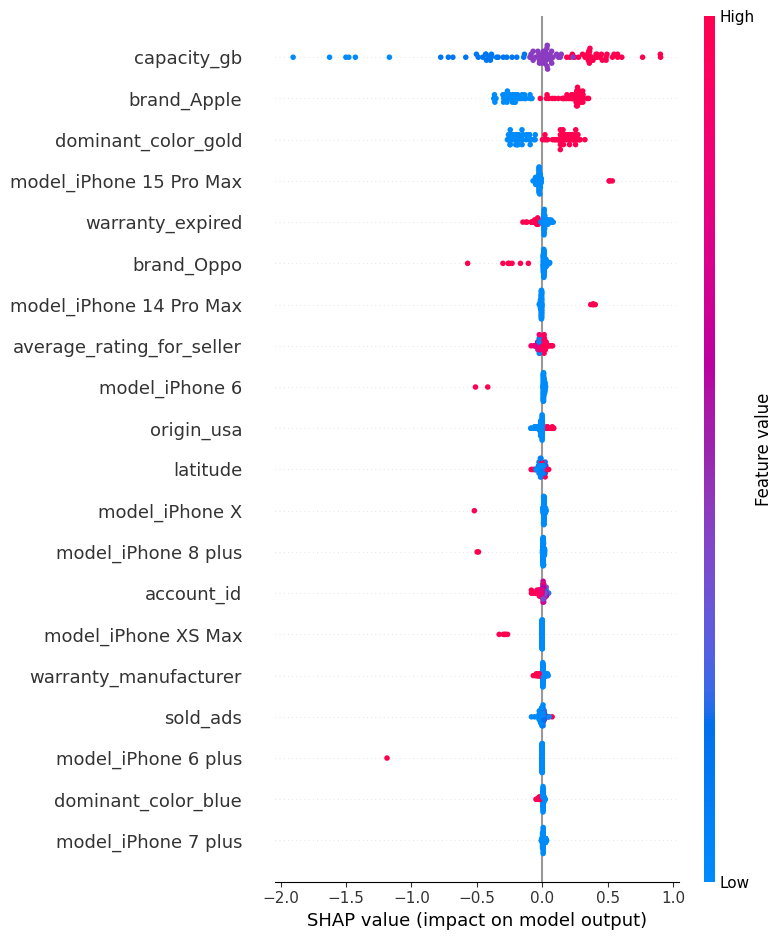

In [ ]:
# Import SHAP library for explainability
import shap

# Calculate SHAP values for the Random Forest model
# rf_model: Trained Random Forest model
# X_test: Test dataset used for evaluation
# X_train: Training dataset for creating the SHAP explainer
# Use a sample of 100 rows from X_test for SHAP computation to reduce computational overhead
rf_shap_values, X_test_sample = calculate_shap_values(rf_model, X_test, X_train, sample_size=100)

# Generate a summary plot for SHAP values with importance of features
# Each dot represents a SHAP value for a specific feature and data point
# Feature importance is ranked from top to bottom, with the most influential feature at the top
shap.summary_plot(rf_shap_values, X_test_sample)

*The chart shows the impact of various features on the prediction target (pricing).*

1. Top Features:
- capacity_gb:

Storage capacity is the most important feature, which aligns with consumer preferences for higher storage in premium phones. The strong impact indicates that storage upgrades directly influence price or demand.
- dominant_color_gold:

Gold-colored phones are associated with luxury and exclusivity, which makes them highly valued in the market. This feature highlights the significance of color in consumer perception and pricing.
- brand_Apple:

Apple dominates as a key driver of price or demand, reflecting its premium positioning and high brand equity in the market.
2. Specific Models:
- model_iPhone 15 Pro Max and model_iPhone 14 Pro Max have a significant impact on predictions.
These models likely represent the highest price tiers or strongest demand.

- model_iPhone 6: The inclusion of older iPhone models shows residual demand or resale value in the second-hand market.
3. Warranty Status:

  - warranty_expired:

- Expired warranties negatively influence price or demand, indicating that consumers place a premium on warranty coverage.
  - warranty_manufacturer
- Phones with a manufacturer's warranty positively impact predictions, reinforcing the importance of trust and assurance for buyers.
4. Seller and Region Factors:
- average_rating_for_seller:
Seller ratings significantly influence consumer trust and willingness to pay higher prices.
- latitude and longitude:
Geographic location impacts pricing, likely reflecting regional disparities in demand or availability.
5. Other Contributing Features:
- sold_ads:
The number of sold ads is moderately influential, indicating that experienced or high-volume sellers can command better prices.
- origin_usa:
Phones originating from the USA may have higher perceived value, especially for premium brands like Apple.